In [11]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import random
import math

In [12]:
analyse_1 = pd.read_csv("analyse_1.csv")
analyse_1.head()

,MONTHS_SINCE_LAST,SUM(QUANTITY_OF_BLOOD)
0,72,250
1,74,250
2,40,250
3,39,250
4,22,250


In [13]:
months=analyse_1["MONTHS_SINCE_LAST"].values
blood=analyse_1["SUM(QUANTITY_OF_BLOOD)"].values

In [14]:
def normalisation(dataframe):
    dataframe2 = dataframe.copy()
    mat = dataframe.as_matrix()
    cpt=0
    for e in dataframe.columns :
        mat[:,cpt] = (mat[:,cpt] - dataframe[e].min()) / (dataframe[e].max() - dataframe[e].min())
        cpt+=1
    return dataframe2

def dist_vect(vec1,vec2):
    somme=0
    for a in range (len(vec1)):
        somme=somme+math.pow(vec1[a]-vec2[a],2)
    return math.sqrt(somme)

def centroide(dataframe):
    lr=[]
    somme=0
    dataframe2 = dataframe.copy()
    mat = dataframe.as_matrix()
    #print(mat[0])
    for e in range (len(mat[0])):
        somme=0
        for a in mat[:,e]:
            somme=somme+a
        lr.append(somme/len(mat))
    mat2=np.array(lr)
    
    dico={}
    
    o=0
    for i in dataframe.columns:
        dico[i]=[mat2[o]]
        o=o+1
    return pd.DataFrame(data=dico)

def inertie_cluster (dataframe):
    i=0
    somme=0
    ck=centroide(dataframe)
    n=len(dataframe.index)
    while (i<n):
        xi=dataframe.iloc[i]
        centro=ck.iloc[0]
        somme+=dist_vect(centro,xi)**2
        i=i+1
    return somme

def initialisation(K,dataframe):
    lf = random.sample(list(dataframe.index),K)
    mat = dataframe.as_matrix()
    d={}
    for e in dataframe.columns:
        lr=[]
        s=dataframe[e]
        for i in lf:
            lr.append(s[i])
        d[e]=lr
    return pd.DataFrame(data=d)

def plus_proche(exemple,dataframe):
    n=len(dataframe.index)
    min=999
    indice=-1
    for i in range (n):
        current=dist_vect(exemple,dataframe.iloc[i])
        if (current<=min):
            if (current==min):
                if (indice<i):
                    indice=i
            else:
                min=current
                indice=i
    return indice

def affecte_cluster(data_apprentissage,centroide):
    dico={}
    for i in range(len(centroide.index)):
        dico[i]=[]
    for i in range (len(data_apprentissage.index)):
        dico[plus_proche(data_apprentissage.iloc[i],centroide)].append(i)
    return dico

def nouveaux_centroides(data_apprentissage,dicoaff):
    d= pd.DataFrame()
    for key in dicoaff:
        d=d.append(centroide(data_apprentissage.iloc[dicoaff[key]]),ignore_index=True)
    return d

def inertie_globale(base_apprentissage,dicoaff):
    somme=0
    for i in dicoaff:
        l=dicoaff[i]
        somme+=inertie_cluster(base_apprentissage.iloc[l])
    return somme

def kmoyennes(k,base,epsilon,iter_max):
    j_prec=1000
    j=0
    i=0
    while ((abs(j_prec-j)>=epsilon) and (i <= iter_max)):  
        centroide=initialisation(k,base)
        dicoaff=affecte_cluster(base,centroide)
    
        centroide2=nouveaux_centroides(base,dicoaff)
        dicoaff2=affecte_cluster(base,centroide)
    
        j_prec=inertie_globale(base,dicoaff)
        j=inertie_globale(base,dicoaff2)
        i+=1
        print ("iteration",i,"Inertie : ", j, "Difference:", j-j_prec)
    return centroide2,dicoaff2

def affiche_resultat(data,centre,affec):
    c=0
    for i in affec.values():
        if (c==0):
            plt.scatter(data['X'][i],data['Y'][i],color='b')
        if (c==1):
            plt.scatter(data['X'][i],data['Y'][i],color='r')
        if (c==2):
            plt.scatter(data['X'][i],data['Y'][i],color='y')
        c=c+1
    plt.scatter(centre['X'],centre['Y'],color='r',marker='x')

In [15]:
def normalize (table):
    acc=0
    tab2=[]
    for i in table :
        acc+=i
    for i in table:
        tab2.append(i/acc)
    print (acc)
    return tab2

In [16]:
dico = dict()
tabX=[]
tabY=[]
#74 106000

for i in months:
    tabX.append(i)

for i in blood:
    tabY.append(i)
    
tabXn=normalize(tabX)
tabYn=normalize(tabY)
    
dico['X']=tabXn
dico['Y']=tabYn

df = pd.DataFrame(data=dico)
df_copy=df

600
550250


In [17]:
print (dico)

{'X': [0.12, 0.12333333333333334, 0.06666666666666667, 0.065, 0.03666666666666667, 0.06333333333333334, 0.058333333333333334, 0.043333333333333335, 0.041666666666666664, 0.028333333333333332, 0.03, 0.03333333333333333, 0.016666666666666666, 0.025, 0.021666666666666667, 0.01, 0.0, 0.013333333333333334, 0.011666666666666667, 0.02, 0.015, 0.008333333333333333, 0.005, 0.0016666666666666668, 0.035, 0.03833333333333333, 0.02666666666666667, 0.023333333333333334, 0.018333333333333333], 'Y': [0.00045433893684688776, 0.00045433893684688776, 0.00045433893684688776, 0.00045433893684688776, 0.00045433893684688776, 0.0009086778736937755, 0.0013630168105406633, 0.002271694684234439, 0.0027260336210813267, 0.0031803725579282144, 0.004543389368468878, 0.006360745115856429, 0.007723761926397092, 0.009541117673784643, 0.011358473421172195, 0.021353930031803726, 0.023625624716038164, 0.02407996365288505, 0.030895047705588367, 0.03225806451612903, 0.04134484325306679, 0.04906860517946388, 0.05179463880054

In [18]:
df_norm=normalisation(df_copy)
les_centres, l_affectation = kmoyennes(2, df_norm, 0.3, 100)

iteration 1 Inertie :  0.05269292610092422 Difference: 0.0


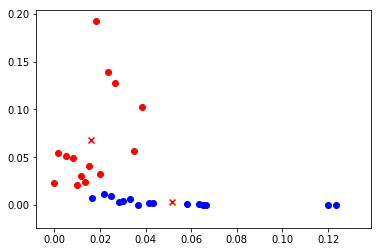

In [19]:
affiche_resultat(df_norm,les_centres,l_affectation)
plt.show()